In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import api_key

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | high rock
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | whitianga
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | alugan
Processing Record 15 of Set 1 | wuhan
Processing Record 16 of Set 1 | scottsburgh
City not found. Skipping...
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | valparaiso
Processing Record 20 of Set 1 | khasan
Processing Record 21 of Set 1 | ji

Processing Record 41 of Set 4 | abashiri
Processing Record 42 of Set 4 | salalah
Processing Record 43 of Set 4 | tuatapere
Processing Record 44 of Set 4 | valdivia
Processing Record 45 of Set 4 | loknya
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | kachiry
Processing Record 48 of Set 4 | poum
Processing Record 49 of Set 4 | benghazi
Processing Record 50 of Set 4 | si sa ket
Processing Record 1 of Set 5 | cabedelo
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | saint anthony
Processing Record 4 of Set 5 | pisco
Processing Record 5 of Set 5 | yanchukan
City not found. Skipping...
Processing Record 6 of Set 5 | morondava
Processing Record 7 of Set 5 | lolua
City not found. Skipping...
Processing Record 8 of Set 5 | college
Processing Record 9 of Set 5 | olafsvik
Processing Record 10 of Set 5 | alofi
Processing Record 11 of Set 5 | chupei
City not found. Skipping...
Processing Record 12 of Set 5 | port keat

Processing Record 31 of Set 8 | santiago del estero
Processing Record 32 of Set 8 | oistins
Processing Record 33 of Set 8 | betong
Processing Record 34 of Set 8 | flin flon
Processing Record 35 of Set 8 | gualeguaychu
Processing Record 36 of Set 8 | kavieng
Processing Record 37 of Set 8 | blacksburg
Processing Record 38 of Set 8 | emerald
Processing Record 39 of Set 8 | coquimbo
Processing Record 40 of Set 8 | kunda
Processing Record 41 of Set 8 | rio gallegos
Processing Record 42 of Set 8 | fukue
Processing Record 43 of Set 8 | aviles
Processing Record 44 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 45 of Set 8 | moranbah
Processing Record 46 of Set 8 | mitu
Processing Record 47 of Set 8 | tori
Processing Record 48 of Set 8 | svobodnyy
Processing Record 49 of Set 8 | juneau
Processing Record 50 of Set 8 | carrickmacross
Processing Record 1 of Set 9 | kita
Processing Record 2 of Set 9 | luderitz
Processing Record 3 of Set 9 | nichinan
Processing Record 4 of Set 9 | bud
Proces

Processing Record 15 of Set 12 | portel
Processing Record 16 of Set 12 | vicksburg
Processing Record 17 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 18 of Set 12 | luba
Processing Record 19 of Set 12 | roebourne
Processing Record 20 of Set 12 | praia
Processing Record 21 of Set 12 | burica
City not found. Skipping...
Processing Record 22 of Set 12 | canico
Processing Record 23 of Set 12 | ler
Processing Record 24 of Set 12 | dubasari
Processing Record 25 of Set 12 | mardan
Processing Record 26 of Set 12 | cidreira
Processing Record 27 of Set 12 | brawley
Processing Record 28 of Set 12 | ulagan
Processing Record 29 of Set 12 | ziyang
Processing Record 30 of Set 12 | tiksi
Processing Record 31 of Set 12 | goure
Processing Record 32 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 33 of Set 12 | port hardy
Processing Record 34 of Set 12 | falealupo
City not found. Skipping...
Processing Record 35 of Set 12 | port-gentil
Processing Reco

In [25]:
len(city_data)

575

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,41.95,28,0,13.00,US,2022-02-04 02:29:34
1,Faanui,-16.4833,-151.7500,81.28,70,1,15.12,PF,2022-02-04 02:30:20
2,Airai,-8.9266,125.4092,73.17,63,74,4.68,TL,2022-02-04 02:30:20
3,High Rock,26.6208,-78.2833,73.42,69,0,16.67,BS,2022-02-04 02:30:20
4,Bredasdorp,-34.5322,20.0403,60.12,72,100,3.44,ZA,2022-02-04 02:30:18
5,Busselton,-33.6500,115.3333,97.05,33,57,15.95,AU,2022-02-04 02:30:21
6,Whitianga,-36.8333,175.7000,74.23,69,7,10.16,NZ,2022-02-04 02:30:21
7,Rikitea,-23.1203,-134.9692,78.08,74,100,18.41,PF,2022-02-04 02:30:22
8,Mataura,-46.1927,168.8643,52.48,99,100,2.84,NZ,2022-02-04 02:30:22
9,Hermanus,-34.4187,19.2345,60.91,72,100,9.33,ZA,2022-02-04 02:30:23


In [43]:
#new_column_order = ["column2", "column9", "column10", "column3", "column4", "column5", "column6", "column7", "column8"]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2022-02-04 02:29:34,37.1041,-113.5841,41.95,28,0,13.00
1,Faanui,PF,2022-02-04 02:30:20,-16.4833,-151.7500,81.28,70,1,15.12
2,Airai,TL,2022-02-04 02:30:20,-8.9266,125.4092,73.17,63,74,4.68
3,High Rock,BS,2022-02-04 02:30:20,26.6208,-78.2833,73.42,69,0,16.67
4,Bredasdorp,ZA,2022-02-04 02:30:18,-34.5322,20.0403,60.12,72,100,3.44
...,...,...,...,...,...,...,...,...,...
570,Teya,RU,2022-02-04 02:45:51,60.3778,92.6267,11.57,94,100,6.22
571,Bowen,AU,2022-02-04 02:45:51,-20.0167,148.2333,80.82,76,100,5.95
572,Toora-Khem,RU,2022-02-04 02:45:52,52.4675,96.1100,-12.77,99,96,1.68
573,Itaituba,BR,2022-02-04 02:45:52,-4.2761,-55.9836,73.06,94,40,0.89


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [48]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

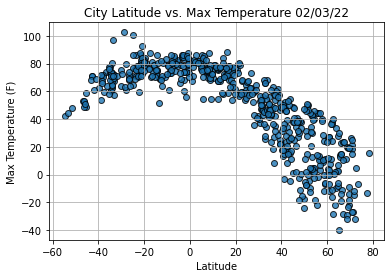

In [49]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

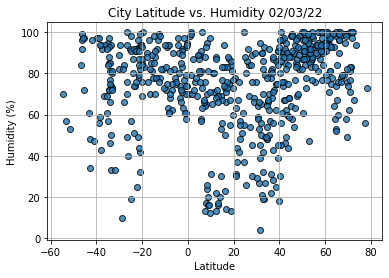

In [50]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

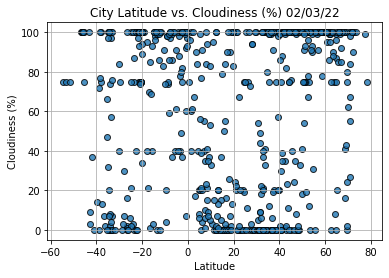

In [51]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

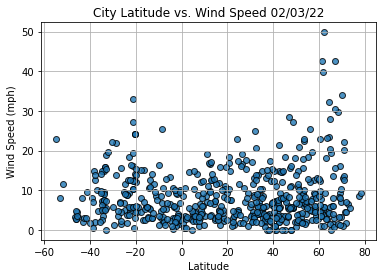

In [52]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()